###  predcting mredian housing value  

In [44]:
# AIM - to predict the median housing price  for a home using linear regression

In [45]:
# here we have imported the file and read the file

In [46]:
import pandas as pd
df=pd.read_csv('housing.csv')

In [47]:
df.size

206400

In [48]:
df.shape

(20640, 10)

In [49]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [53]:
import matplotlib.pyplot as plt

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <BarContainer object of 10 artists>)

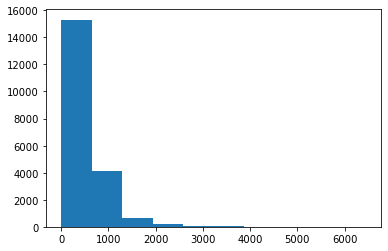

In [54]:
plt.hist(df['total_bedrooms'])

In [55]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [56]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


In [57]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [58]:
import seaborn as sns

<AxesSubplot:>

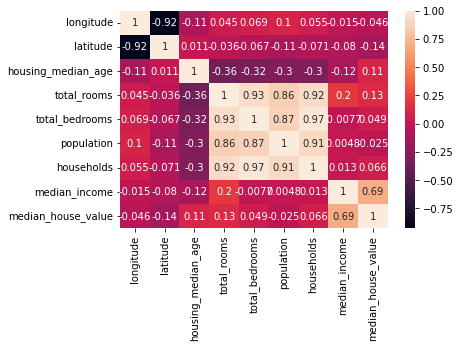

In [59]:
sns.heatmap(df.corr(),annot=True)

In [60]:
df1=df.drop(['median_house_value'],axis=1)

In [61]:
# applyig chi-squre test for feature engineearing 

In [62]:
# ho=there is no relation between given variable and targer column

In [63]:
# considering 5% of error margin if p_value <0.05 we reject the null

In [64]:
for cols in df1.columns:
    df2=pd.crosstab(df1[cols],df['median_house_value'])
    from scipy.stats import chi2_contingency
    a,p_value,b,c=chi2_contingency(df2)
    if p_value>0.05:
        print(f'{cols} has p_values of {(p_value)}')
    




longitude has p_values of 1.0
latitude has p_values of 1.0
housing_median_age has p_values of 0.9814367004795036
total_bedrooms has p_values of 0.9937090722128754
population has p_values of 1.0


In [65]:
# from this hypothesis and conforming from corelation matrix we can drop 'longitude','latitude','housing_median_age ','total_bedrooms
# population


In [66]:
df1.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY


In [67]:
df2=df1.drop(['ocean_proximity'],axis=1)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sd=StandardScaler()

In [70]:
std_df=sd.fit_transform(df2)

In [71]:
df3=pd.DataFrame(std_df)

In [72]:
df3.columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [73]:
df3.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766


In [74]:
final_df=pd.concat([df3,df1['ocean_proximity']],axis=1)

In [75]:
### since cean_proximity being nominal categorical hence converting into numerical using technique of one-hot-encoding

In [76]:
df4=pd.get_dummies(final_df)

In [77]:
df4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,0,1,0,0,0


In [78]:
final_df1=pd.concat([df4,df['median_house_value']],axis=1)

In [79]:
final_df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,0,0,0,1,0,452600.0
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,0,0,0,1,0,358500.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,0,0,0,1,0,352100.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,0,0,0,1,0,341300.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,0,0,0,1,0,342200.0


### simple regression

In [80]:
df=pd.DataFrame()
df['median_income']=final_df1['median_income']
df['median_house_value']=final_df1['median_house_value']

In [81]:
df.head()

,median_income,median_house_value
0,2.344766,452600.0
1,2.332238,358500.0
2,1.782699,352100.0
3,0.932968,341300.0
4,-0.012881,342200.0


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
train_df,test_df=train_test_split(df,train_size=0.8,random_state=43)


In [84]:
x_train=train_df.iloc[:,[0]]

In [85]:
y_train=train_df.iloc[:,[1]]
x_test=test_df.iloc[:,[0]]
y_test=test_df.iloc[:,[1]]

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr=LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred_test=lr.predict(x_test)

In [90]:
y_pred_train=lr.predict(x_train)

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_test,y_pred_test)

0.4854061844497555

In [93]:
#model is not performing good for simple regression 

### multiple regression

In [95]:
df_train,df_test=train_test_split(final_df1,train_size=0.8,random_state=43)

In [96]:
x_df_train=df_train.iloc[:,:-1]

In [97]:
y_df_train=df_train.iloc[:,[-1]]
x_df_test=df_test.iloc[:,:-1]
y_df_test=df_test.iloc[:,[-1]]

In [98]:
lr.fit(x_df_train,y_df_train)

LinearRegression()

In [99]:
y_pred_test=lr.predict(x_df_test)
y_pred_train=lr.predict(x_df_train)

In [100]:
r2_score(y_df_test,y_pred_test)

0.6348632138057448

In [101]:
r2_score(y_df_train,y_pred_train)

0.6472523875449148

# still model is not working good. model seems to be underfitted

### lasso_regression

In [102]:
from sklearn.linear_model import Lasso

In [103]:
lasso=Lasso()

In [104]:
lasso.fit(x_df_train,y_df_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.332e+12, tolerance: 2.198e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [105]:
pred_lasso=lasso.predict(x_df_test)

In [106]:
r2_score(y_df_test,pred_lasso)

0.6348794770601668

### ridge regression

In [107]:
from sklearn.linear_model import Ridge

In [108]:
ridge=Ridge()

In [109]:
ridge.fit(x_df_train,y_df_train)

Ridge()

In [110]:
pred_ridge=ridge.predict(x_df_test)

In [111]:
r2_score(y_df_test,pred_ridge)

0.6349457043608457

In [112]:
### as model is still underfitted so changig the model

### applying dicision tree regressors

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dr=DecisionTreeRegressor()

In [115]:
dr.fit(x_df_train,y_df_train)

DecisionTreeRegressor()

In [116]:
pred_dr=dr.predict(x_df_test)

In [117]:
from sklearn import metrics

In [118]:
metrics.r2_score(y_df_test,pred_dr)

0.6434368057733804

### applying gradient bostong regressor 

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
gbr=GradientBoostingRegressor()

In [121]:
gbr.fit(x_df_train,y_df_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [122]:
pred_gbr=gbr.predict(x_df_test)

In [123]:
metrics.r2_score(y_df_test,pred_gbr)

0.7812514493859899

### applying bagging-regressor

In [124]:
from sklearn.ensemble import BaggingRegressor

In [125]:
br=BaggingRegressor()

In [126]:
br.fit(x_df_train,y_df_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor()

In [127]:
pred_br=br.predict(x_df_test)

In [128]:
r2_score(y_df_test,pred_br)

0.810898673522274

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid_bagging={'n_estimators':list(range(1,100,10))}

In [131]:
grid_model=GridSearchCV(br,param_grid_bagging)

In [132]:
import numpy as np
y_df_train=np.ravel(y_df_train)


In [133]:
grid_model.fit(x_df_train,y_df_train)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [134]:
grid_model.best_estimator_

BaggingRegressor(n_estimators=81)

In [135]:
br=BaggingRegressor(n_estimators=71,bootstrap=True,oob_score=True)

In [136]:
br.fit(x_df_train,y_df_train)

BaggingRegressor(n_estimators=71, oob_score=True)

In [137]:
pred_br=br.predict(x_df_test)

In [138]:
r2_score(y_df_test,pred_br)

0.8298596005478938

In [139]:
### hence model is performing better with bagging regressor with accuracy of 82.88%

In [140]:
df=pd.DataFrame()

In [141]:
df['Regressor']=['linear-regression-univariate','linear-regression-multivariate','ridge-regressor','lasso-regressor','dicisoin-tree-regressor','GradientBoostingRegressor','BaggingRegressor','BaggingRegressor-with grid serch cv']

In [142]:
df['r2_score']=[48.5,64.7,63.4,63.4,64.7,78.1,81,82.8]

In [143]:
df

,Regressor,r2_score
0,linear-regression-univariate,48.5
1,linear-regression-multivariate,62.6
2,ridge-ressor,62.0
3,lasso-regressor,62.6
4,dicisoin-tree-regressor,66.7
5,GradientBoostingRegressor,78.3
6,BaggingRegressor,81.1
7,BaggingRegressor-with grid serch cv,82.8
